In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))


In [5]:
import csv

In [6]:
taxi_df = pd.read_csv('nyc_taxi_data_2014.csv')

/Users/huongvu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
taxi_df.shape

(14999999, 18)

In [8]:
taxi_df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

In [9]:
taxi_df.dtypes

vendor_id              object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
rate_code               int64
store_and_fwd_flag     object
dropoff_longitude     float64
dropoff_latitude      float64
payment_type           object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
dtype: object

In [12]:
taxi_df.head(5)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,1,N,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,1,N,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,1,N,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,1,N,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,1,N,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75


In [13]:
taxi_df.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.499985e+07,1.499985e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07
mean,1.701826e+00,2.792074e+00,-7.296749e+01,4.019355e+01,1.033778e+00,-7.290756e+01,4.016132e+01,1.201335e+01,3.145898e-01,4.982227e-01,1.455907e+00,2.404203e-01,1.452348e+01
std,1.390736e+00,3.326122e+00,8.586309e+00,4.762641e+00,7.177268e-01,8.843060e+00,4.897983e+00,1.006726e+01,3.633407e-01,2.975721e-02,2.244646e+00,1.191025e+00,1.216687e+01
min,0.000000e+00,0.000000e+00,-7.366000e+02,-1.800000e+02,0.000000e+00,-7.754167e+02,-1.800000e+02,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,1.000000e+00,1.000000e+00,-7.399198e+01,4.073535e+01,1.000000e+00,-7.399135e+01,4.073420e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,1.000000e+00,1.700000e+00,-7.398183e+01,4.075298e+01,1.000000e+00,-7.398007e+01,4.075337e+01,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01
75%,2.000000e+00,3.080000e+00,-7.396735e+01,4.076724e+01,1.000000e+00,-7.396351e+01,4.076839e+01,1.350000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.610000e+01
max,2.080000e+02,1.000000e+02,8.054390e+01,7.328431e+01,2.100000e+02,1.193360e+02,4.040833e+02,5.000000e+02,1.340000e+01,5.000000e-01,2.000000e+02,2.000000e+01,7.000000e+02


In [ ]:
#There are no numerical columns with missing data
#The passenger count varies between 1 and 208 with most people number of people being 1 or 2
#The trip duration varying from 0 to 100km with most distance of 1 to 3.08 km. 

In [16]:
non_num_cols=['vendor_id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']
print(taxi_df[non_num_cols].count())

vendor_id             14999999
pickup_datetime       14999999
dropoff_datetime      14999999
store_and_fwd_flag     7363922
dtype: int64


In [ ]:
#there are some missing values for store_and_fwd_flag

In [ ]:
taxi_df['pickup_datetime']

In [20]:
#Convert pick up datetime and dropoff datetime to datetime format.
taxi_df['pickup_datetime']=pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime']=pd.to_datetime(taxi_df['dropoff_datetime'])

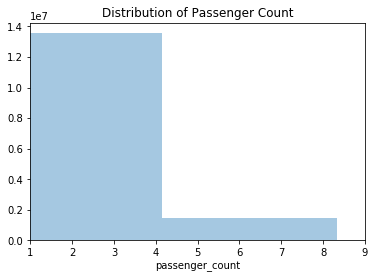

In [30]:
#passenger count
ax=sns.distplot(taxi_df['passenger_count'],kde=False)
ax.set(xlim=(1, 9))

plt.title('Distribution of Passenger Count')

plt.show()

In [ ]:
#Here we see that the mostly 1 or 4 passengers avail the cab. 
#The instance of large group of people travelling together is rare.

In [32]:
taxi_df['pickup_datetime'].nunique()

2545052

In [33]:
taxi_df['dropoff_datetime'].nunique()

2548337

In [34]:
#The returned values are 2545052 and 2548337. 
#This shows that there are many different pickup and drop off dates in these 2 columns.

In [41]:
taxi_df['pickup_day']=taxi_df['pickup_datetime'].dt.day_name()
taxi_df['dropoff_day']=taxi_df['dropoff_datetime'].dt.day_name()

In [42]:
taxi_df['pickup_day'].value_counts()

Thursday     2598300
Wednesday    2395288
Friday       2344615
Saturday     2023312
Sunday       1950472
Monday       1907419
Tuesday      1780593
Name: pickup_day, dtype: int64

In [43]:
taxi_df['dropoff_day'].value_counts() 

Thursday     2593965
Wednesday    2387455
Friday       2337582
Saturday     2026622
Sunday       1966191
Monday       1907836
Tuesday      1780348
Name: dropoff_day, dtype: int64

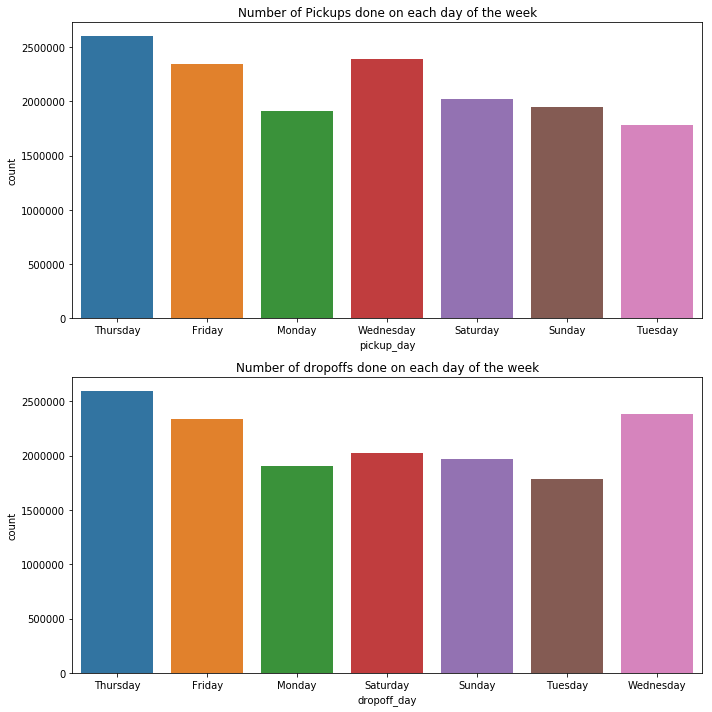

In [48]:
#The distribution of days of the week can be seen graphically as well
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=taxi_df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=taxi_df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

In [ ]:
#The graphs denote the average estimate of a trip for each day of the week.
#Thus the highest avg time taken to complete a trip is on Thursday 
#while Monday, Tuesday, Saturday and Sunday takes the least time.

In [55]:
#The distribution of Pickup and Drop Off hours of the day

def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    


Text(0.5, 1.0, 'Distribution of dropoff hours')

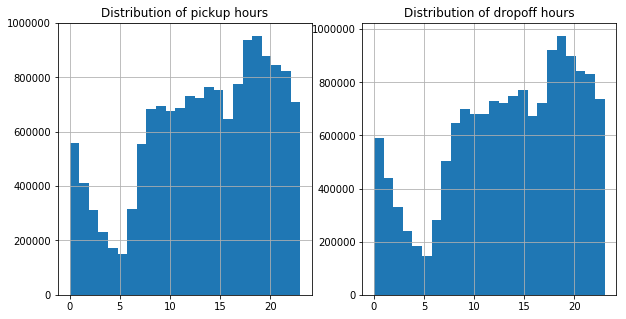

In [67]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
taxi_df['pickup_hour']=taxi_df['pickup_datetime'].dt.hour
taxi_df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')

taxi_df['dropoff_hour']=taxi_df['dropoff_datetime'].dt.hour
taxi_df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

In [ ]:
#The highest trips distance are started in evening (between 16 and 20 hours) 
#and the least are  in the late night and early morning between 3–6 hours)

In [69]:
taxi_df['store_and_fwd_flag'].value_counts()

N    7196241
Y     167681
Name: store_and_fwd_flag, dtype: int64

In [70]:
#The number of N flag is much larger. 
#We can later see whether they have any relation with the duration of the trip.

Text(0.5, 1.0, 'The distribution of the PickUpDistancedistribution')

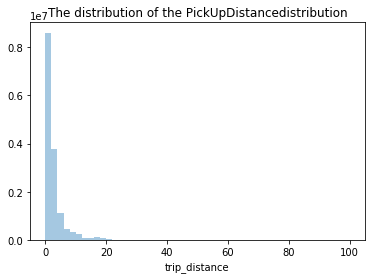

In [103]:
sns.distplot(taxi_df['trip_distance'],kde=False)
plt.title('The distribution of the PickUpDistancedistribution')

In [ ]:
#This histogram shows extreme left skewness, hence there are outliers.

In [6]:
print(taxi_df['trip_distance'].nlargest(10))

6140586     100.00
11667654    100.00
12944112    100.00
11340318     98.60
423010       98.30
6116144      97.10
13238439     96.90
13315761     96.60
14035356     94.90
11155948     94.45
Name: trip_distance, dtype: float64


Text(0.5, 1.0, 'Distribution of the pickup distance after the treatment of outliers')

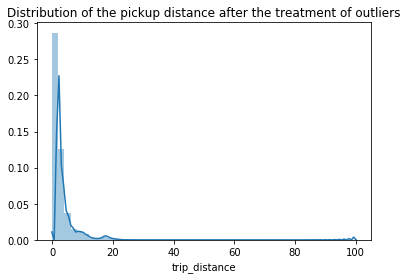

In [81]:
sns.distplot(taxi_df['trip_distance'])
plt.title('Distribution of the pickup distance after the treatment of outliers')

In [82]:
#Still there is an extreme right skewness. Thus we will divide the trip_duration column into some interval.

#The intervals are decided as follows:

    #less than 5 hours
    #5–10 hours
    #10–15 hours
    #15–20 hours
    # than 20 hours

In [83]:
bins=np.array([0,1800,3600,5400,7200,90000])
taxi_df['distance_time']=pd.cut(taxi_df.trip_distance,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [85]:
bins=np.array([0,1800,3600,5400,7200,90000])
taxi_df['distance_time']=pd.cut(taxi_df.trip_distance,bins,labels=["<5","5-10","10-15","15-20",">20"])

Text(0.5, 1.0, 'The distribution of Pick up Longitude')

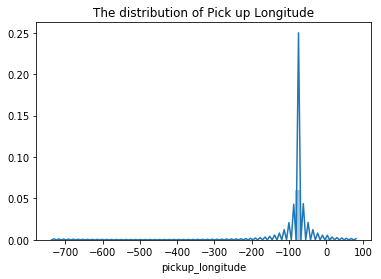

In [86]:
sns.distplot(taxi_df['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

Text(0.5, 1.0, 'The distribution of Pick up Latitude')

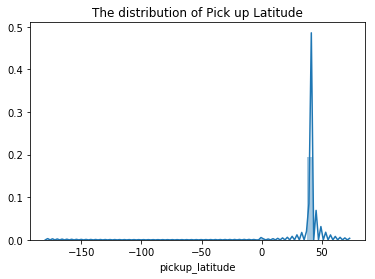

In [100]:
sns.distplot(taxi_df['pickup_latitude'])
plt.title('The distribution of Pick up Latitude')

In [ ]:
sns.distplot(taxi_df['dropoff_latitude'])
plt.title('The distribution of drop off Latitude')

In [ ]:
sns.distplot(taxi_df['dropoff_longitude'])
plt.title('The distribution of dropoff longitude')

In [ ]:
taxi_df['vendor_id'].hist(bins=2)

In [ ]:
#The distribution of vendor id is not much different as expected.

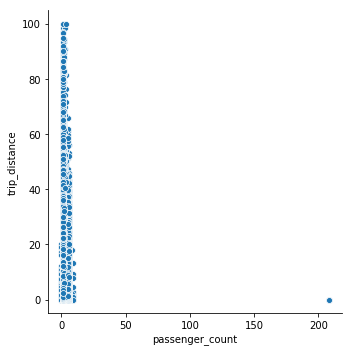

In [7]:
#The relationship between passenger count and trip distance
sns.relplot(x="passenger_count", y="trip_distance", data=taxi_df, kind="scatter")

In [10]:
#Here we see, passenger count has no such relationship with trip duration. 
#Thus we see there is only value above 200
#while all the others are somewhere between 0 and 9.
#The one near 200 is definitely an outlier which must be treated.

In [ ]:
a=sns.relplot(x="passenger_count", y="trip_distance", data=taxi_df, kind="scatter")
a.set(xlim=(1, 9))
plt.show()

In [ ]:
#The relationship between vendor id and distance

In [ ]:
b=sns.catplot(x="vendor_id", y="trip_distance",kind="strip",data=taxi.df)
b.set(ylim=(1, 9))

In [ ]:
#The relationship between geographical location and distance

In [8]:
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_timezone',data=taxi_df);

ValueError: Could not interpret input 'pickup_timezone'

In [ ]:
#The relationship between store forward flag and distance

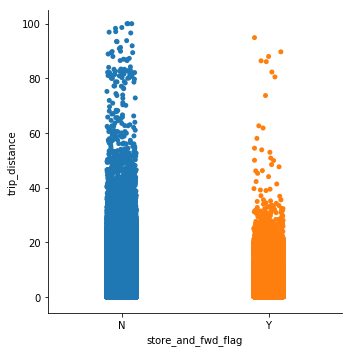

In [7]:
sns.catplot(x="store_and_fwd_flag", y="trip_distance",kind="strip",data=taxi_df)